In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD



In [62]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()
train_X.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(60000, 28, 28)

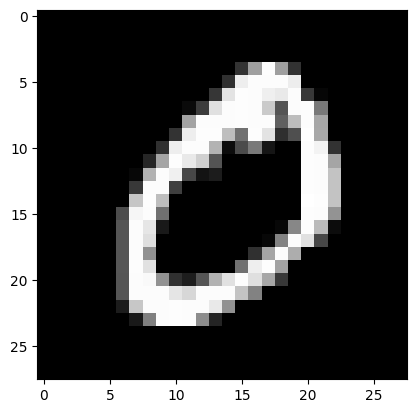

In [63]:
plt.imshow(train_X[1],cmap='gray')

In [64]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [68]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Reshape and normalize images
train_X = train_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_X = test_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to categorical using tf.keras.utils.to_categorical
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)


In [69]:
train_y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [121]:
import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])


d:\UNIVERISTY\GROWTH\CNN based projects\ml_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [122]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

None


In [124]:
batch_size=32
epochs=10

plotting_data = model.fit(train_X,
                          train_y,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(test_X,test_y))

loss,accuracy = model.evaluate(test_X,test_y,verbose=0)

print('Test loss ---> ',str(round(loss*100,2)) +str('%'))
print('Test accuracy ---> ',str(round(accuracy*100,2)) +str('%'))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6767 - loss: 1.1515 - val_accuracy: 0.9048 - val_loss: 0.3397
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9053 - loss: 0.3301 - val_accuracy: 0.9216 - val_loss: 0.2739
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9214 - loss: 0.2727 - val_accuracy: 0.9302 - val_loss: 0.2431
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9322 - loss: 0.2347 - val_accuracy: 0.9372 - val_loss: 0.2096
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9387 - loss: 0.2087 - val_accuracy: 0.9426 - val_loss: 0.1920
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9460 - loss: 0.1872 - val_accuracy: 0.9480 - val_loss: 0.1748
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9493 - loss: 0.1758 - val_accuracy: 0.9483 - val_loss: 0.1650
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9545 - loss: 0.1590 - 

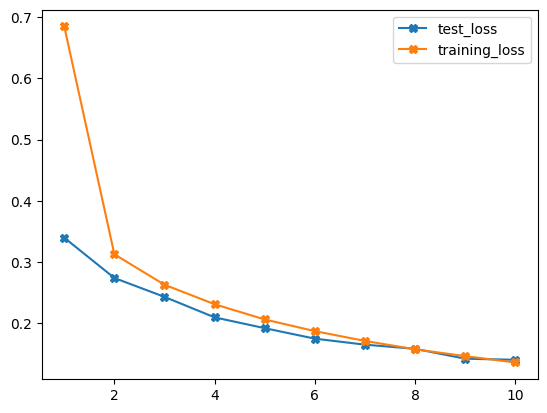

In [125]:

plotting_data_dict = plotting_data.history

test_loss = plotting_data_dict['val_loss']
training_loss = plotting_data_dict['loss']
test_accuracy = plotting_data_dict['val_accuracy']
training_accuracy = plotting_data_dict['accuracy']

epochs = range(1,len(test_loss)+1)

plt.plot(epochs,test_loss,marker='X',label='test_loss')
plt.plot(epochs,training_loss,marker='X',label='training_loss')
plt.legend()


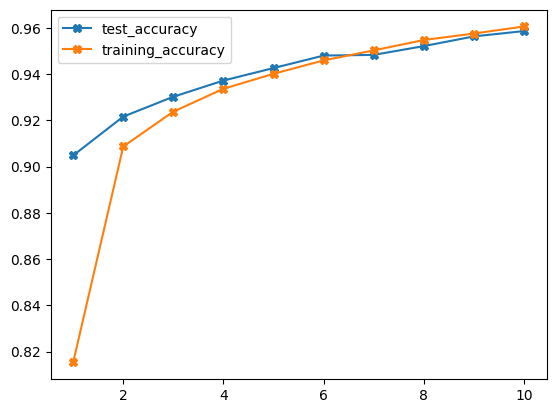

In [126]:
plt.plot(epochs,test_accuracy,marker='X',label='test_accuracy')
plt.plot(epochs,training_accuracy,marker='X',label='training_accuracy')
plt.legend()

In [136]:
model.save('MNIST_10_epochs.h5')
print('Model Saved !!!')

Model Saved !!!


In [84]:
classifier = load_model('MNIST_10_epochs.h5')

In [146]:
#random_image_path='MNIST_digit.png'
random_image_path='9.png'

In [138]:
from PIL import Image
import numpy as np
import tensorflow as tf
# Function to preprocess a random image
def preprocess(image_path):
    """Loads, processes, and returns the image ready for prediction."""
    img = Image.open(image_path)
    img = img.resize((28, 28))  # Resize image to 28x28
    img = img.convert('L')  # Convert image to grayscale
    img = np.array(img)  # Convert image to numpy array
    img = tf.cast(img, tf.float32) / 255.0  # Normalize image
    img = tf.expand_dims(img, axis=0)  # Expand dimensions to match the input shape
    return img
# Example usage
# Predict the class of the image
# Replace with your image path
processed_image = preprocess(random_image_path)



predictions = model.predict(processed_image)
print(predictions)
predicted_class = np.argmax(predictions)
print(f'The predicted class is: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[1.7418639e-01 2.5528591e-02 9.9999940e-01 9.9999690e-01 1.6574266e-05
  8.4246206e-01 1.7670020e-02 8.9660698e-01 9.9910533e-01 9.5367935e-03]]
The predicted class is: 2


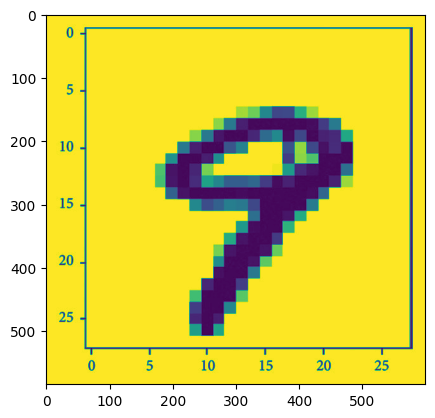

In [147]:
input_image = cv2.imread(random_image_path)

plt.imshow(input_image)
input_image.shape
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale)

In [148]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [149]:
input_image_resize = input_image_resize/255

In [150]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [151]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[9.8267013e-01 1.1439212e-02 9.9562675e-01 9.9994510e-01 7.6328624e-06
  1.0000000e+00 8.3685040e-01 2.0771897e-05 9.9641335e-01 4.9443929e-03]]


In [152]:
input_pred_label = np.argmax(input_prediction)

In [153]:
print(input_pred_label)

5
